# Práctica Machine Learning

Predecir el precio del Airbnb utilizando los datos disponibles.


### 1) Importación de Librerias

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [67]:
# Instalación de otra opción para análisis exploratorio:
!pip install ipywidgets
!pip install ydata_profiling

from ydata_profiling import ProfileReport

### 2) Carga de Datos y Análisis Exploratorio

In [80]:
from sklearn.model_selection import train_test_split

houses_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')

train, test = train_test_split(houses_df, test_size=0.2, shuffle=True, random_state=0)

In [82]:
# Metadata
print(f'Dataframe Train Dimensiones: {train.shape}')
print(f'Dataframe Test Dimensiones: {test.shape}')

Dataframe Train Dimensiones: (11824, 89)
Dataframe Test Dimensiones: (2956, 89)


In [83]:
# Análisis con libreria ProfileReport 
#ProfileReport(houses_df)

In [84]:
# Guardar Data Y Test como csv separados

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

In [85]:
df_train.head().T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Listing Url,https://www.airbnb.com/rooms/5994463,https://www.airbnb.com/rooms/14136180,https://www.airbnb.com/rooms/15520134,https://www.airbnb.com/rooms/8809721,https://www.airbnb.com/rooms/1162707
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,PISO ATOCHA- FLAT NEAR ATOCHA .,The Palace Sol Madrid.,por persona la noche metro linea5 vista alegre,CITY CENTER JACINTO BENAVENTE ROOM4,NICE & BIG DOUBLE ROOM AT DOWNTOWN
Summary,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,NaN
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Description,Piso recién reformado cómoda habitación con ba...,"Lugares de interés: Plaza Mayor, Plaza del Sol...","我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",This stunning and amazig room is covered with ...,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,El barrio de Jeronimos es un enclave tranquilo...,"Situado en el corazón de Madrid, este apartame...",NaN,NaN,NaN


In [86]:
# Describe para analizar valores de cada columna
df_train.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,2881.000000,2869.000000,5052.000000,6974.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,378.437348,1432.390728,189.312154,32.073129,1.581614,7.637601,3.109946,961.732070,8.949002,22.949256,39.803958,202.217185,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,194.751472,1236.992934,116.011858,31.278032,1.160518,12.373491,13.427477,9387.640642,9.340334,19.762734,29.663314,128.006830,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,220.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,240.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,500.000000,1750.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [87]:
# Obtenemos información de los tipos de datos de las columnas y conteo de nulls
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11355 non-null  object 
 6   Space                           8718 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7309 non-null   object 
 10  Notes                           4543 non-null   object 
 11  Transit                         7243 non-null   object 
 12  Access                          

In [88]:
df_train.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                               True
Summary                            True
Space                              True
Description                        True
Experiences Offered               False
Neighborhood Overview              True
Notes                              True
Transit                            True
Access                             True
Interaction                        True
House Rules                        True
Thumbnail Url                      True
Medium Url                         True
Picture Url                        True
XL Picture Url                     True
Host ID                           False
Host URL                          False
Host Name                          True
Host Since                         True
Host Location                      True
Host About                         True


In [89]:
# Hasta este punto se consideran las siguientes columnas para ser eliminadas al no ser relevantes a simple vista
columns_to_drop = [
    'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 
    'Host Picture Url', 'Description', 'Space', 'Neighborhood Overview', 'Notes', 
    'Transit', 'Access', 'Interaction', 'House Rules', 'Summary', 'Experiences Offered', 
    'Jurisdiction Names', 'Geolocation', 'ID', 'Host ID', 'Host Name', 'Host Neighbourhood', 
    'Weekly Price', 'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 
    'Reviews per Month', 'Calculated host listings count', 'Host Listings Count', 'Host Total Listings Count',
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Experiences Offered',
    'Name', 'Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode', 'Host About', 'Host Location'
]

# Datos como el country y market se descartan porque hacen todos referencia a Madrid
df_train.drop(columns=columns_to_drop, axis=1, inplace=True)

# Adicionalmente filtramos solo para la ciudad de Madrid
df_houses = df_train[df_train['City'].str.lower() == 'madrid']

In [90]:
df_houses.head().T

,0,1,2,3,4
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio"
Neighbourhood,Jerónimos,NaN,Carabanchel,NaN,Gaztambide
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
Country Code,ES,ES,ES,ES,ES
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631


In [91]:
# Valores diferentes por columna
df_houses.apply(lambda x: len(x.unique()))

Host Since                       1986
Host Response Time                  5
Host Response Rate                 67
Host Verifications                177
Neighbourhood                      66
Neighbourhood Cleansed            125
Neighbourhood Group Cleansed       21
City                                3
Country Code                        1
Latitude                        10575
Longitude                       10575
Property Type                      20
Room Type                           3
Accommodates                       16
Bathrooms                          16
Bedrooms                           11
Beds                               17
Bed Type                            5
Amenities                        9038
Price                             269
Security Deposit                  100
Cleaning Fee                       85
Guests Included                    14
Extra People                       49
Minimum Nights                     39
Maximum Nights                    152
Availability

In [92]:
df_houses.dtypes

Host Since                       object
Host Response Time               object
Host Response Rate              float64
Host Verifications               object
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
Country Code                     object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Amenities                        object
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64


#### Imputamos la variable bedrooms, beds y Host Response Time por los valores ausentes que tiene

In [93]:
# Usamos la moda para llenar los valores nulos
df_houses.loc[:, 'Bedrooms'] = df_houses['Bedrooms'].fillna(df_houses['Bedrooms'].mode()[0])
df_houses.loc[:, 'Beds'] = df_houses['Beds'].fillna(df_houses['Beds'].mode()[0])
df_houses.loc[:, 'Host Response Time'] = df_houses["Host Response Time"].fillna(df_houses["Host Response Time"].mode()[0])

df_houses.isnull().any()

Host Since                       True
Host Response Time              False
Host Response Rate               True
Host Verifications               True
Neighbourhood                    True
Neighbourhood Cleansed          False
Neighbourhood Group Cleansed    False
City                            False
Country Code                    False
Latitude                        False
Longitude                       False
Property Type                   False
Room Type                       False
Accommodates                    False
Bathrooms                        True
Bedrooms                        False
Beds                            False
Bed Type                        False
Amenities                        True
Price                            True
Security Deposit                 True
Cleaning Fee                     True
Guests Included                 False
Extra People                    False
Minimum Nights                  False
Maximum Nights                  False
Availability

In [94]:
df_houses.head()

,Host Since,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Country Code,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Features
0,2015-04-13,within a few hours,100.0,"email,phone,reviews,work_email",Jerónimos,Jerónimos,Retiro,Madrid,ES,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,NaN,25.0,1,0,2,1125,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,"Host Has Profile Pic,Is Location Exact,Require..."
1,2016-07-22,within an hour,100.0,"email,phone,reviews,jumio,offline_government_i...",NaN,Sol,Centro,Madrid,ES,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",50.0,NaN,15.0,1,0,1,1125,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,"Host Has Profile Pic,Host Identity Verified,Re..."
2,2016-07-17,within an hour,100.0,"email,phone,facebook,google,reviews,jumio,gove...",Carabanchel,Vista Alegre,Carabanchel,Madrid,ES,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",10.0,NaN,5.0,1,0,3,30,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,"Host Has Profile Pic,Host Identity Verified,Is..."
3,2014-05-08,within a few hours,100.0,"email,phone,reviews,work_email",NaN,Embajadores,Centro,Madrid,ES,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",30.0,NaN,NaN,1,0,10,1125,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,"Host Has Profile Pic,Requires License"
4,2012-02-06,within an hour,100.0,"email,phone,reviews,jumio",Gaztambide,Gaztambide,Chamberí,Madrid,ES,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",32.0,NaN,NaN,1,10,1,1125,7,34,62,337,97,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,"Host Has Profile Pic,Host Identity Verified,Is..."


### 2.1) Análisis de correlación por la variable objetivo "Price"

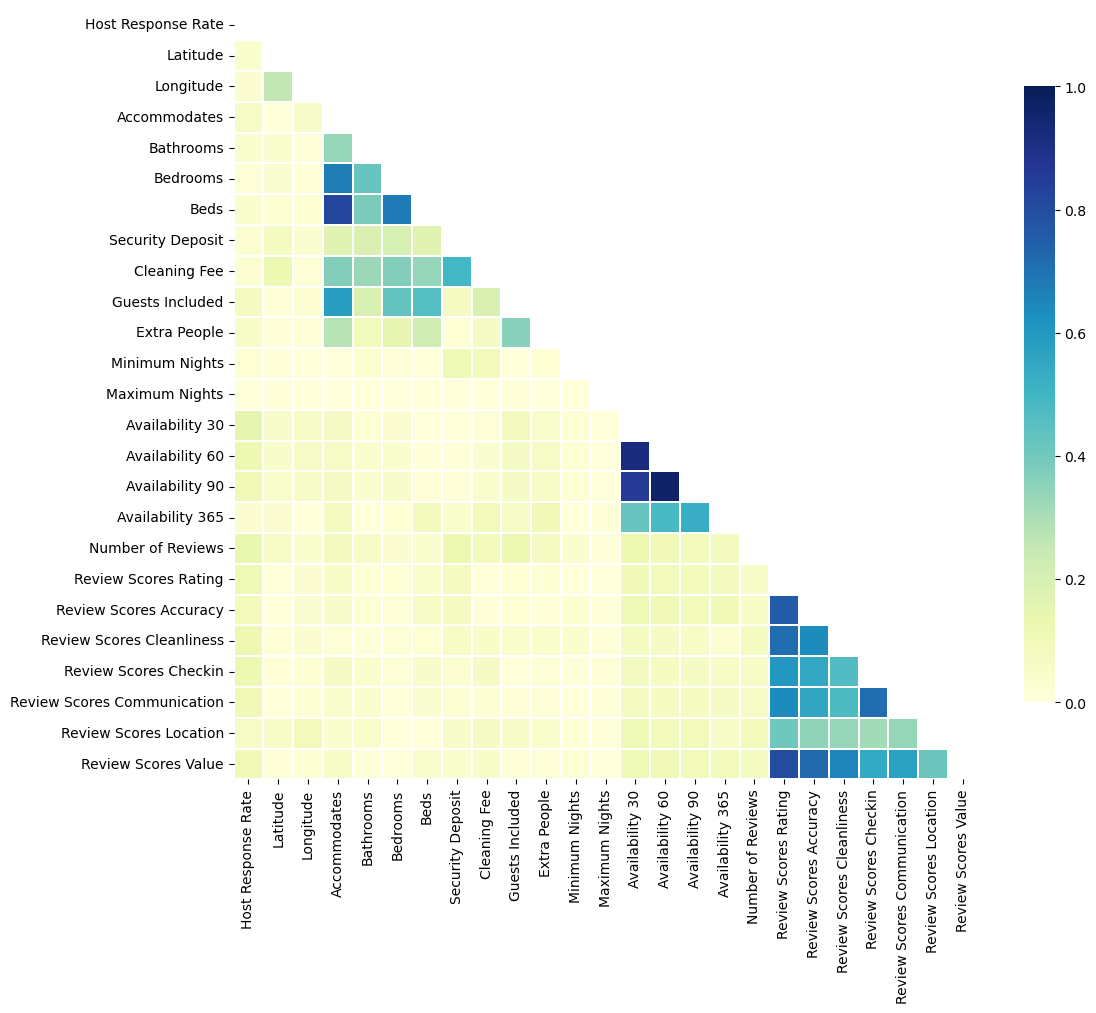

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_df = df_houses.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr = np.abs(numeric_df.drop(['Price'], axis=1).corr())

# Generar una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujar el heatmap con la máscara y la proporción de aspecto correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()


Se observa una alta correlación entre las variables "Number of Reviews" Y las variables "Availability 30,60,90"
Adicionalmente Beds con Accomodates tiene una alta correlación igualmente

In [96]:
import numpy as np

# Seleccionar solo columnas numéricas
numeric_df = df_houses.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr().abs()

# Seleccionar el triángulo superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar las columnas con una correlación mayor que un umbral (por ejemplo, 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Eliminar las columnas correlacionadas
df_houses = df_houses.drop(columns=to_drop, axis=1)

print(f"Variables eliminadas: {to_drop}")


Variables eliminadas: ['Availability 60', 'Availability 90']


#### Adicional a las que nos borro por un umbral mayor a 0.9 de correlación se eliminan las siguientes


In [97]:
df_houses.drop([
    'Review Scores Rating', 
    'Review Scores Accuracy', 
    'Review Scores Cleanliness', 
    'Review Scores Checkin',
    'Review Scores Value', 
    'Review Scores Communication', 
    'Review Scores Location', 
    'Availability 30', 
    'Accommodates'], axis=1, inplace=True)

df_houses.head().T

,0,1,2,3,4
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio"
Neighbourhood,Jerónimos,NaN,Carabanchel,NaN,Gaztambide
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
City,Madrid,Madrid,Madrid,Madrid,Madrid
Country Code,ES,ES,ES,ES,ES
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631


### Volvemos a cálcular la matriz de correlación

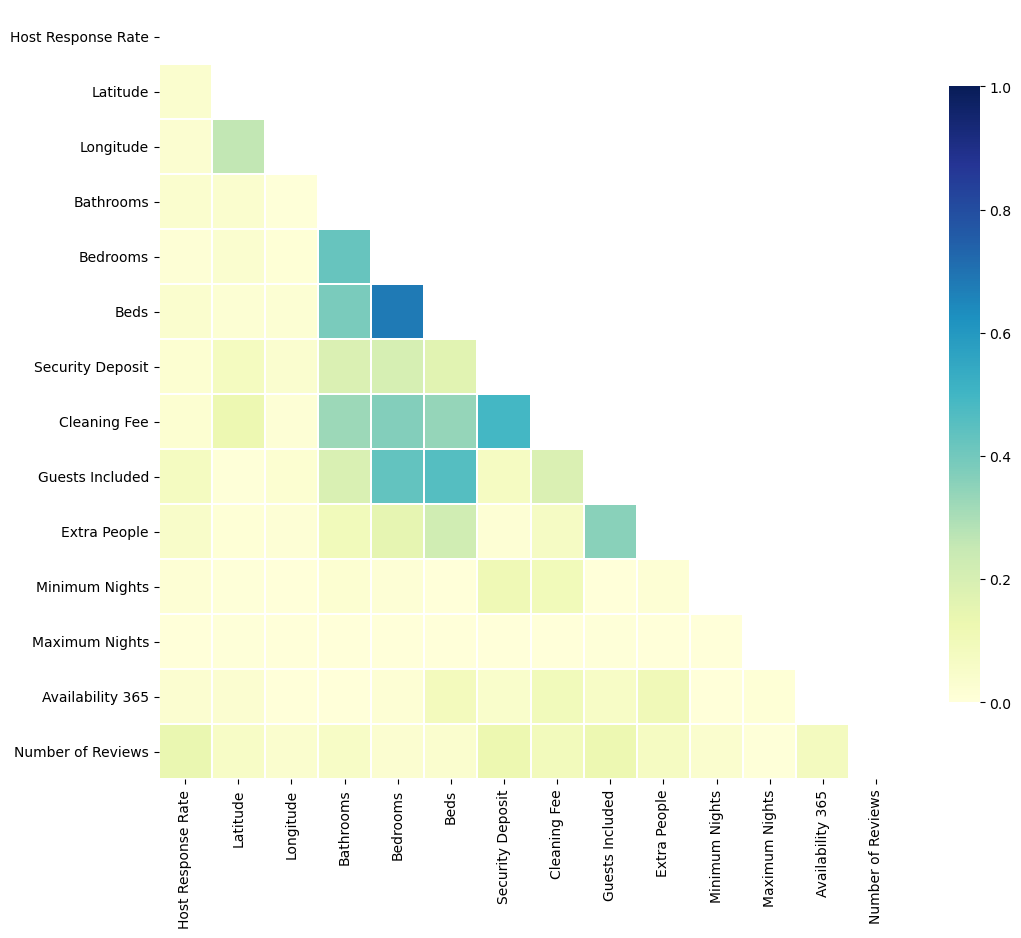

In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_df = df_houses.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr = np.abs(numeric_df.drop(['Price'], axis=1).corr())

# Generar una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujar el heatmap con la máscara y la proporción de aspecto correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()


#### Dibujamos un Scatter plot para ver las relaciones de las diferentes variables

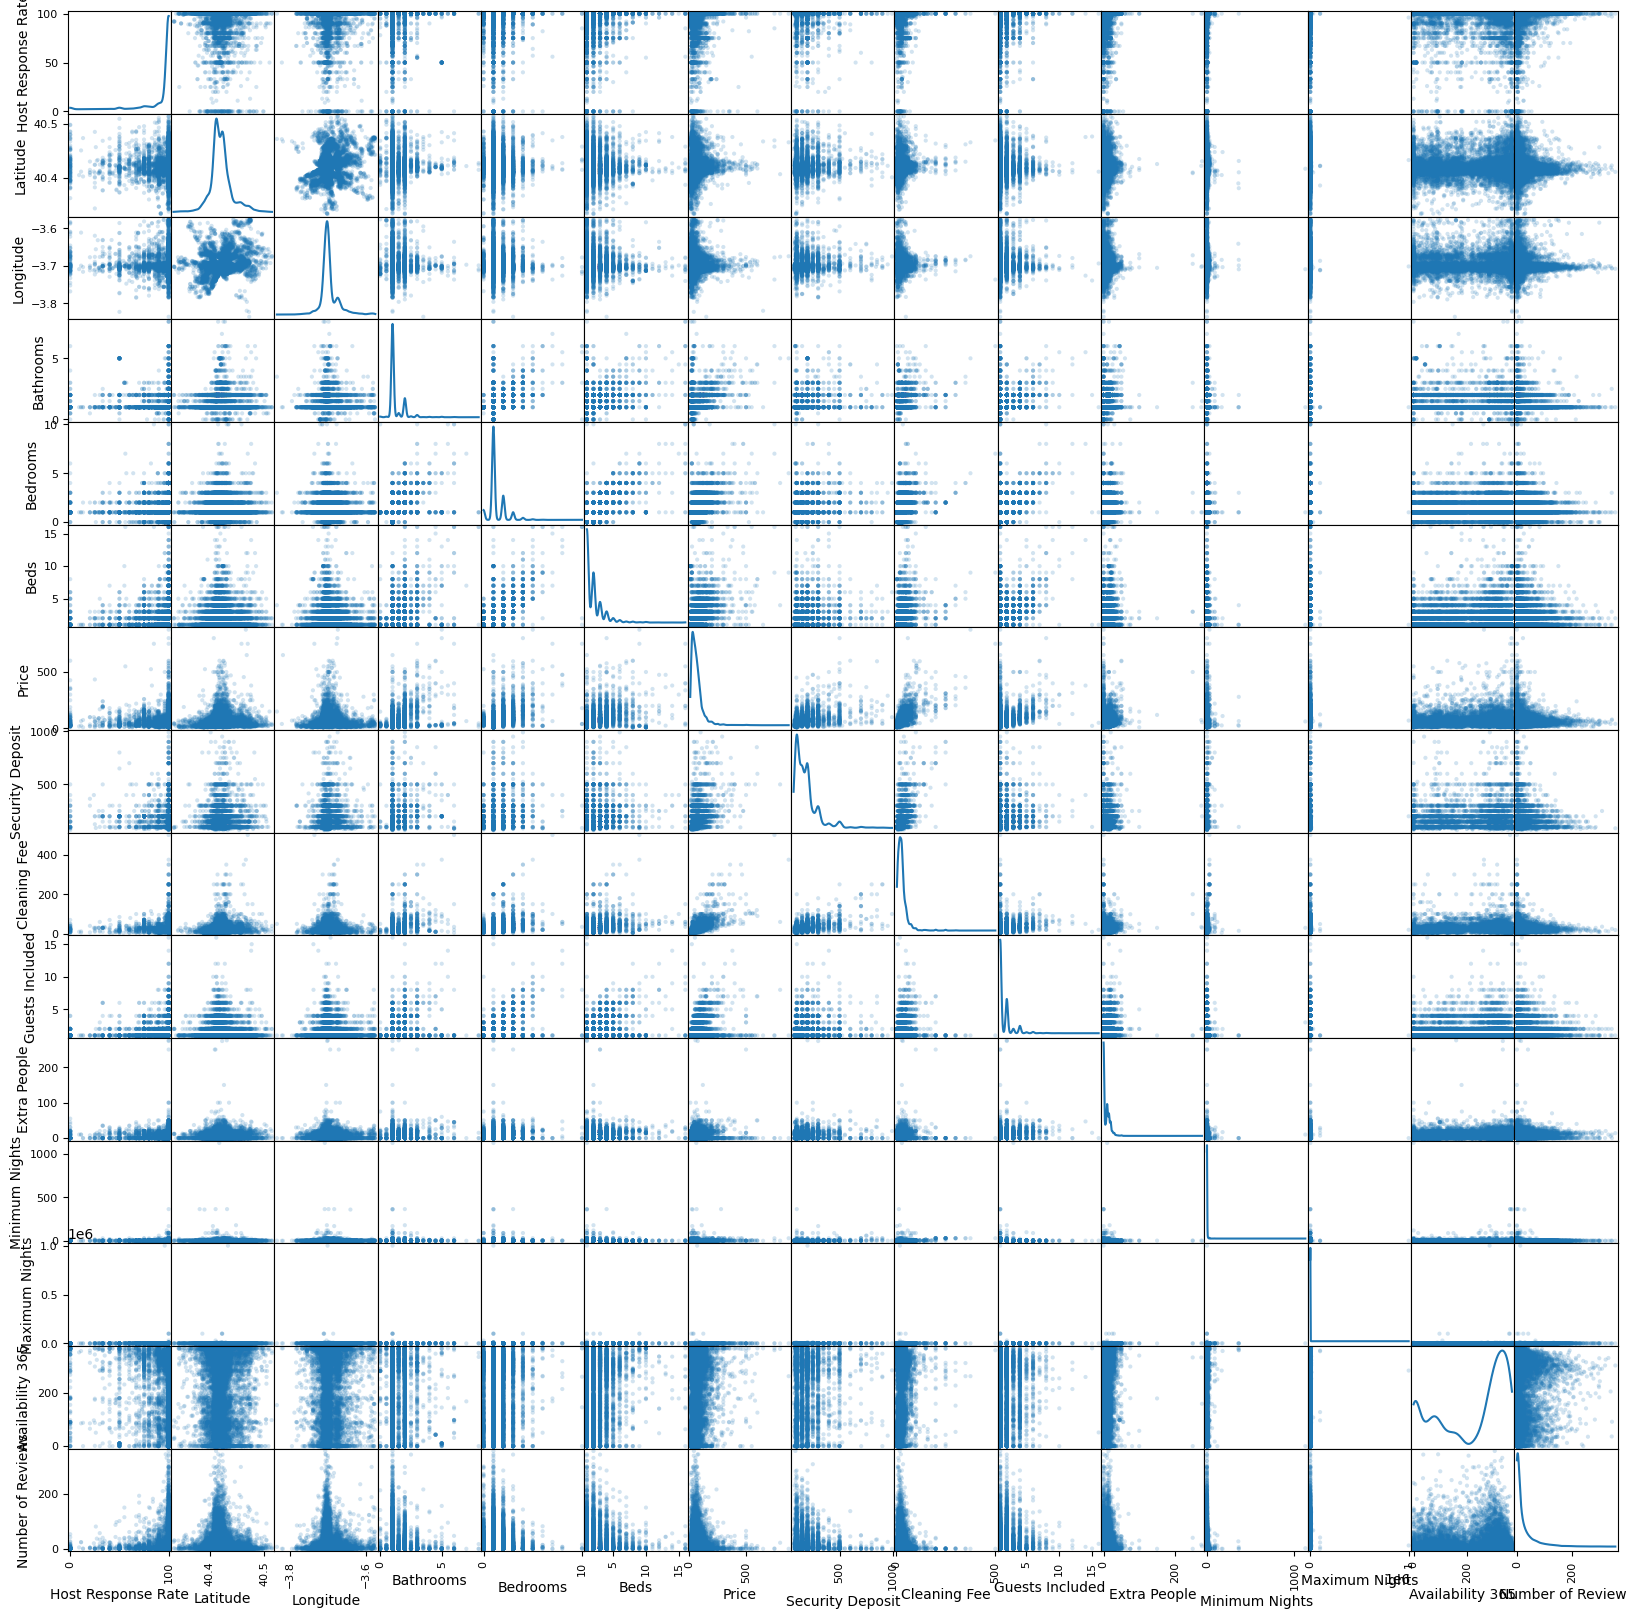

In [99]:
pd.plotting.scatter_matrix(df_houses, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

#### Analizamos los outliers del precio

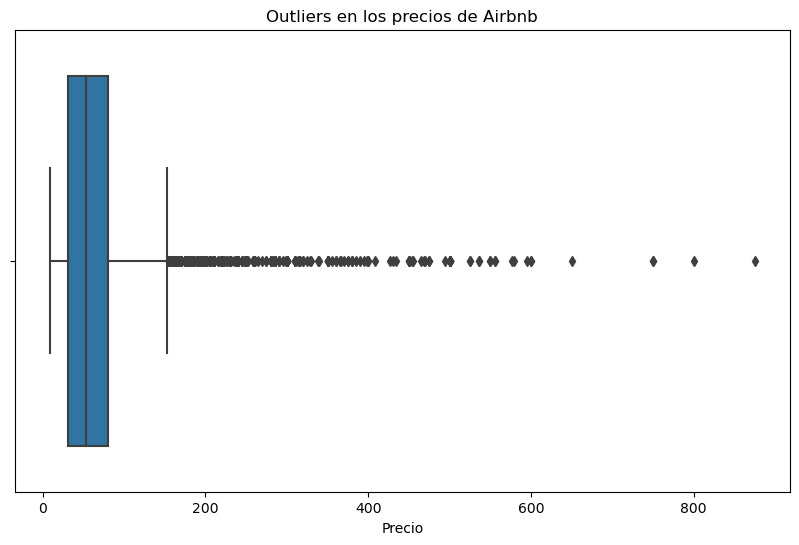

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_houses['Price'])
plt.title('Outliers en los precios de Airbnb')
plt.xlabel('Precio')
plt.show()

#### Se observa que los precios anomalos estan por encima de 200, por lo que para este caso procedemos a borrarlos 

In [101]:
# Número de registros a limpiar
len(df_houses[df_houses['Price'] > 200])

249

In [102]:
# Limpieza
df_houses = df_houses[df_houses['Price'] < 200]

In [103]:
# Reducción de columnas a 29 columnas
df_houses.shape

(10266, 29)

In [104]:
df_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,8997.0,94.846171,15.109387,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,10266.0,40.420323,0.019907,40.332908,40.409954,40.418242,40.427618,40.514247
Longitude,10266.0,-3.697122,0.023364,-3.835498,-3.707773,-3.701621,-3.693959,-3.575142
Bathrooms,10230.0,1.225269,0.559328,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10266.0,1.245763,0.752132,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,10266.0,1.908533,1.375349,1.000000,1.000000,1.000000,2.000000,16.000000
Price,10266.0,59.489869,35.802295,9.000000,30.000000,50.000000,79.000000,199.000000
Security Deposit,4400.0,178.213409,102.194961,70.000000,100.000000,150.000000,200.000000,990.000000
Cleaning Fee,6076.0,27.453752,18.816323,5.000000,15.000000,25.000000,35.000000,250.000000
Guests Included,10266.0,1.538866,0.980620,1.000000,1.000000,1.000000,2.000000,16.000000


## 3) Generación de nuevas características

#### Se observa que las columnas de Host Verification, Features, Amenities se pueden transformar en columnas que aporten mayor información.

In [105]:
from collections import Counter

# ANALISIS DE FRECUENCIA Y ASIGNACIÓN de PESOS 

# Rellenar los huecos con cadenas vacías
df_houses[['Features', 'Amenities', 'Host Verifications']] = df_houses[['Features', 'Amenities', 'Host Verifications']].fillna("")

# Calcular la frecuencia de cada elemento en 'Features', 'Amenities' y 'Host Verifications'
features_counter = Counter()
amenities_counter = Counter()
host_verifications_counter = Counter()

for index, row in df_houses.iterrows():
    features_counter.update(row['Features'].split(','))
    amenities_counter.update(row['Amenities'].split(','))
    host_verifications_counter.update(row['Host Verifications'].split(','))

# Crear una función para asignar un peso basado en la frecuencia
def assign_weights(counter):
    total_count = sum(counter.values())
    weights = {key: total_count / count for key, count in counter.items()}
    return weights

features_weights = assign_weights(features_counter)
amenities_weights = assign_weights(amenities_counter)
host_verifications_weights = assign_weights(host_verifications_counter)

# Calcular la suma de los pesos de cada lista para cada fila
def calculate_weighted_sum(items, weights):
    return sum(weights[item.strip()] for item in items.split(',') if item.strip() in weights)

df_houses['Features'] = df_houses['Features'].apply(lambda x: calculate_weighted_sum(str(x), features_weights))
df_houses['Amenities'] = df_houses['Amenities'].apply(lambda x: calculate_weighted_sum(str(x), amenities_weights))
df_houses['Host Verifications'] = df_houses['Host Verifications'].apply(lambda x: calculate_weighted_sum(str(x), host_verifications_weights))

df_houses[['Features', 'Amenities', 'Host Verifications']].head(10)


,Features,Amenities,Host Verifications
0,13.299563,325.332601,59.140943
1,24.298062,609.950060,112.231571
2,30.060521,2002.512229,126.069174
3,7.537104,117.340471,59.140943
4,19.908050,617.857831,20.178478
5,51.306424,546.273238,20.178478
6,38.935478,789.354226,12.909836
7,13.299563,479.689716,59.140943
9,321.077505,1276.264756,66.409584
10,19.908050,237.101721,112.231571


In [106]:
df_houses.columns

Index(['Host Since', 'Host Response Time', 'Host Response Rate',
       'Host Verifications', 'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'Country Code', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 365', 'Number of Reviews',
       'Cancellation Policy', 'Features'],
      dtype='object')

#### Por otro lado se observa una caracteristica particular con las columnas 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed'

In [107]:
df_houses[['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']].head(20)

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed
0,Jerónimos,Jerónimos,Retiro
1,NaN,Sol,Centro
2,Carabanchel,Vista Alegre,Carabanchel
3,NaN,Embajadores,Centro
4,Gaztambide,Gaztambide,Chamberí
5,Embajadores,Embajadores,Centro
6,NaN,Palacio,Centro
7,Sol,Sol,Centro
9,Goya,Goya,Salamanca
10,Embajadores,Embajadores,Centro


In [108]:
# A grandes rasgos se observa que la información puede estar fragmentada por lo que debemos consolidarla en una sola caracteristica

df_houses['Neighbourhood final'] = df_houses['Neighbourhood'].combine_first(df_houses['Neighbourhood Cleansed']).combine_first(df_houses['Neighbourhood Group Cleansed'])
df_houses.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)
print(df_houses.head(20))

    Host Since  Host Response Time  Host Response Rate  Host Verifications  \
0   2015-04-13  within a few hours               100.0           59.140943   
1   2016-07-22      within an hour               100.0          112.231571   
2   2016-07-17      within an hour               100.0          126.069174   
3   2014-05-08  within a few hours               100.0           59.140943   
4   2012-02-06      within an hour               100.0           20.178478   
5   2014-05-16      within an hour               100.0           20.178478   
6   2012-03-25  within a few hours               100.0           12.909836   
7   2014-05-08  within a few hours               100.0           59.140943   
9   2011-05-17      within an hour               100.0           66.409584   
10  2016-07-09      within an hour               100.0          112.231571   
11  2011-03-18      within an hour                89.0           12.909836   
12  2014-10-19  within a few hours               100.0          

In [109]:
df_houses[['Neighbourhood final']].head(20)

,Neighbourhood final
0,Jerónimos
1,Sol
2,Carabanchel
3,Embajadores
4,Gaztambide
5,Embajadores
6,Palacio
7,Sol
9,Goya
10,Embajadores


#### Host desde:

In [110]:
from datetime import datetime

df_houses.dropna(subset=['Host Since'], inplace=True) # se ha visto antes que solo hay tres valores missing, no se pierde mucho

df_houses['Host Since'] = df_houses['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_houses['Years Being Host'] = df_houses['Host Since'].apply(lambda x: 2017 - x.year)

df_houses.drop(['Host Since'], axis=1, inplace=True)

In [111]:
df_houses.head(20)

,Host Response Time,Host Response Rate,Host Verifications,City,Country Code,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Features,Neighbourhood final,Years Being Host
0,within a few hours,100.0,59.140943,Madrid,ES,40.407732,-3.684819,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,325.332601,60.0,NaN,25.0,1,0,2,1125,117,12,moderate,13.299563,Jerónimos,2
1,within an hour,100.0,112.231571,Madrid,ES,40.415802,-3.705340,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,609.950060,50.0,NaN,15.0,1,0,1,1125,208,20,flexible,24.298062,Sol,1
2,within an hour,100.0,126.069174,Madrid,ES,40.389048,-3.740374,Apartment,Shared room,1.5,1.0,8.0,Real Bed,2002.512229,10.0,NaN,5.0,1,0,3,30,140,0,moderate,30.060521,Carabanchel,1
3,within a few hours,100.0,59.140943,Madrid,ES,40.412814,-3.703052,Apartment,Private room,3.0,1.0,1.0,Real Bed,117.340471,30.0,NaN,NaN,1,0,10,1125,311,0,strict,7.537104,Embajadores,3
4,within an hour,100.0,20.178478,Madrid,ES,40.438631,-3.713716,Apartment,Private room,1.0,1.0,1.0,Real Bed,617.857831,32.0,NaN,NaN,1,10,1,1125,337,97,strict,19.908050,Gaztambide,5
5,within an hour,100.0,20.178478,Madrid,ES,40.411880,-3.702481,Apartment,Private room,1.0,1.0,1.0,Real Bed,546.273238,35.0,NaN,NaN,1,0,2,60,356,43,strict,51.306424,Embajadores,3
6,within a few hours,100.0,12.909836,Madrid,ES,40.415087,-3.710994,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,789.354226,80.0,300.0,18.0,2,21,1,3,75,24,flexible,38.935478,Palacio,5
7,within a few hours,100.0,59.140943,Madrid,ES,40.418266,-3.705617,Apartment,Private room,3.0,1.0,1.0,Real Bed,479.689716,25.0,NaN,14.0,1,5,10,1125,74,0,strict,13.299563,Sol,3
9,within an hour,100.0,66.409584,Madrid,ES,40.426410,-3.673278,Apartment,Entire home/apt,2.0,2.0,3.0,Real Bed,1276.264756,158.0,NaN,160.0,2,20,7,180,52,3,strict,321.077505,Goya,6
10,within an hour,100.0,112.231571,Madrid,ES,40.408683,-3.700160,Apartment,Private room,1.0,1.0,1.0,Real Bed,237.101721,29.0,NaN,NaN,1,10,2,1125,65,37,moderate,19.908050,Embajadores,1


### 4) Categorización de Variables

In [112]:
df_houses.dtypes

Host Response Time      object
Host Response Rate     float64
Host Verifications     float64
City                    object
Country Code            object
Latitude               float64
Longitude              float64
Property Type           object
Room Type               object
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type                object
Amenities              float64
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Extra People             int64
Minimum Nights           int64
Maximum Nights           int64
Availability 365         int64
Number of Reviews        int64
Cancellation Policy     object
Features               float64
Neighbourhood final     object
Years Being Host         int64
dtype: object

#### Filtramos las columnas que no son númericas

In [113]:
list(df_houses.select_dtypes(include=['object']).columns)

['Host Response Time',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Neighbourhood final']

In [114]:
categorical = [
 'Host Response Time',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Neighbourhood final'
]

mean_map = {}

# Calcular la media de 'Price' para cada categoría y mapear los valores
for c in categorical:
    mean = df_houses.groupby(c)['Price'].mean()
    df_houses[c] = df_houses[c].map(mean)
    mean_map[c] = mean

In [115]:
## Limpieza de registros con baños cero y precio cero
df_houses = df_houses[df_houses['Bathrooms'] != 0]
df_houses = df_houses[df_houses['Price'] != 0]

In [116]:
# Mover Price a la primera posición
cols = df_houses.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df_houses = df_houses[cols]

# Rellenar valores NAN con la media de columnas numéricas
df_houses.fillna(df_houses.mean(), inplace=True)

In [117]:
df_houses.dtypes

Price                  float64
Host Response Time     float64
Host Response Rate     float64
Host Verifications     float64
City                   float64
Country Code           float64
Latitude               float64
Longitude              float64
Property Type          float64
Room Type              float64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type               float64
Amenities              float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Extra People             int64
Minimum Nights           int64
Maximum Nights           int64
Availability 365         int64
Number of Reviews        int64
Cancellation Policy    float64
Features               float64
Neighbourhood final    float64
Years Being Host         int64
dtype: object

In [118]:
len(df_houses) - df_houses.count()

Price                  0
Host Response Time     0
Host Response Rate     0
Host Verifications     0
City                   0
Country Code           0
Latitude               0
Longitude              0
Property Type          0
Room Type              0
Bathrooms              0
Bedrooms               0
Beds                   0
Bed Type               0
Amenities              0
Security Deposit       0
Cleaning Fee           0
Guests Included        0
Extra People           0
Minimum Nights         0
Maximum Nights         0
Availability 365       0
Number of Reviews      0
Cancellation Policy    0
Features               0
Neighbourhood final    0
Years Being Host       0
dtype: int64

In [119]:
# Verificamos que no tengamos valores faltantes
df_houses.isnull().any()

Price                  False
Host Response Time     False
Host Response Rate     False
Host Verifications     False
City                   False
Country Code           False
Latitude               False
Longitude              False
Property Type          False
Room Type              False
Bathrooms              False
Bedrooms               False
Beds                   False
Bed Type               False
Amenities              False
Security Deposit       False
Cleaning Fee           False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Availability 365       False
Number of Reviews      False
Cancellation Policy    False
Features               False
Neighbourhood final    False
Years Being Host       False
dtype: bool

In [120]:
df_houses.describe()

,Price,Host Response Time,Host Response Rate,Host Verifications,City,Country Code,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Features,Neighbourhood final,Years Being Host
count,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,1.021100e+04,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000
mean,59.621780,59.491690,94.851327,80.426454,59.491622,5.949167e+01,40.420303,-3.697083,59.524010,59.623952,1.231597,1.246205,1.909901,59.491372,969.915823,178.205192,27.473042,1.541475,7.364509,2.986975,979.654099,204.847909,23.561551,59.504027,30.128607,59.492071,2.695622
std,35.821988,1.209866,14.141093,702.405823,0.349052,8.022420e-12,0.019919,0.023356,5.580160,22.825195,0.552928,0.748949,1.374068,1.129609,4778.977264,66.972753,14.504820,0.982371,9.963426,13.816381,10100.001095,127.317941,38.702649,6.071410,45.308789,13.580218,1.620026
min,10.000000,56.203627,0.000000,4.147082,45.333333,5.949167e+01,40.332908,-3.835498,17.000000,23.783217,0.500000,0.000000,1.000000,43.666667,16.480117,70.000000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,51.694453,3.761933,18.500000,0.000000
25%,30.000000,59.921891,94.851327,12.909836,59.500829,5.949167e+01,40.409944,-3.707735,61.118209,32.405312,1.000000,1.000000,1.000000,59.634968,324.203726,174.000000,20.000000,1.000000,0.000000,1.000000,365.000000,82.000000,1.000000,51.694453,13.299563,49.727273,1.000000
50%,50.000000,59.921891,100.000000,20.178478,59.500829,5.949167e+01,40.418171,-3.701605,61.118209,78.526924,1.000000,1.000000,1.000000,59.634968,484.336969,178.205192,27.473042,1.000000,5.000000,2.000000,1125.000000,247.000000,8.000000,59.888925,19.908050,61.068966,2.000000
75%,79.000000,59.921891,100.000000,59.140943,59.500829,5.949167e+01,40.427583,-3.693941,61.118209,78.526924,1.000000,1.000000,2.000000,59.634968,828.817142,178.205192,30.000000,2.000000,14.000000,3.000000,1125.000000,320.000000,29.000000,65.908040,30.060521,69.645907,4.000000
max,199.000000,60.044183,100.000000,42295.780723,59.500829,5.949167e+01,40.514247,-3.575142,145.000000,78.526924,8.000000,10.000000,16.000000,59.634968,264327.610137,990.000000,250.000000,16.000000,276.000000,1125.000000,1000000.000000,365.000000,356.000000,117.800000,362.628350,88.230769,8.000000


### Aplicar Proceso de limpieza al dataset de Test

In [121]:
# Leer el archivo CSV
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# Columnas a eliminar
columns_to_drop = [
    'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 
    'Host Picture Url', 'Description', 'Space', 'Neighborhood Overview', 'Notes', 
    'Transit', 'Access', 'Interaction', 'House Rules', 'Summary', 'Experiences Offered', 
    'Jurisdiction Names', 'Geolocation', 'ID', 'Host ID', 'Host Name', 'Host Neighbourhood', 
    'Weekly Price', 'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review', 
    'Reviews per Month', 'Calculated host listings count', 'Host Listings Count', 'Host Total Listings Count',
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Experiences Offered',
    'Name', 'Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode', 'Host About', 'Host Location'
]

# Datos como el country y market se descartan porque hacen todos referencia a Madrid
df_test.drop(columns=columns_to_drop, axis=1, inplace=True)

# Adicionalmente filtramos solo para la ciudad de Madrid
df_houses_test = df_test[df_test['City'].str.lower() == 'madrid'].copy()

# Usamos la moda para llenar los valores nulos
df_houses_test['Bedrooms'] = df_houses_test['Bedrooms'].fillna(df_houses_test['Bedrooms'].mode()[0])
df_houses_test['Beds'] = df_houses_test['Beds'].fillna(df_houses_test['Beds'].mode()[0])
df_houses_test['Host Response Time'] = df_houses_test['Host Response Time'].fillna(df_houses_test['Host Response Time'].mode()[0])

df_houses_test.drop(columns=[
    'Review Scores Rating', 
    'Review Scores Accuracy', 
    'Review Scores Cleanliness', 
    'Review Scores Checkin',
    'Review Scores Value', 
    'Review Scores Communication', 
    'Review Scores Location', 
    'Availability 30', 
    'Availability 60', 
    'Availability 90',
    'Accommodates'], axis=1, inplace=True)

# Filtrar outliers
df_houses_test = df_houses_test[df_houses_test['Price'] < 200]

df_houses_test[['Features', 'Amenities', 'Host Verifications']] = df_houses_test[['Features', 'Amenities', 'Host Verifications']].fillna("")

features_counter = Counter()
amenities_counter = Counter()
host_verifications_counter = Counter()

for index, row in df_houses_test.iterrows():
    features_counter.update(row['Features'].split(','))
    amenities_counter.update(row['Amenities'].split(','))
    host_verifications_counter.update(row['Host Verifications'].split(','))

features_weights = assign_weights(features_counter)
amenities_weights = assign_weights(amenities_counter)
host_verifications_weights = assign_weights(host_verifications_counter)

df_houses_test['Features'] = df_houses_test['Features'].apply(lambda x: calculate_weighted_sum(str(x), features_weights))
df_houses_test['Amenities'] = df_houses_test['Amenities'].apply(lambda x: calculate_weighted_sum(str(x), amenities_weights))
df_houses_test['Host Verifications'] = df_houses_test['Host Verifications'].apply(lambda x: calculate_weighted_sum(str(x), host_verifications_weights))

df_houses_test['Neighbourhood final'] = df_houses_test['Neighbourhood'].combine_first(df_houses_test['Neighbourhood Cleansed']).combine_first(df_houses_test['Neighbourhood Group Cleansed'])
df_houses_test.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

df_houses_test.dropna(subset=['Host Since'], inplace=True)

df_houses_test['Host Since'] = df_houses_test['Host Since'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
df_houses_test['Years Being Host'] = df_houses_test['Host Since'].apply(lambda x: 2017 - x.year)

df_houses_test.drop(['Host Since'], axis=1, inplace=True)

In [122]:
# Categorizamos con los datos de test
for c in categorical:
    df_houses_test[c] = df_houses_test[c].map(mean_map[c])


In [123]:
# Comprobamos que no quedan valores no numéricos
df_houses_test[categorical].dtypes

Host Response Time     float64
City                   float64
Country Code           float64
Property Type          float64
Room Type              float64
Bed Type               float64
Cancellation Policy    float64
Neighbourhood final    float64
dtype: object

In [124]:
# Mover Price a la primera posición
cols = df_houses_test.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df_houses_test = df_houses_test[cols]

# Rellenar valores NAN con la media de columnas numéricas
df_houses_test.fillna(df_houses_test.mean(), inplace=True)

In [125]:
# Verificamos que no tengamos valores faltantes
df_houses_test.isnull().any()

Price                  False
Host Response Time     False
Host Response Rate     False
Host Verifications     False
City                   False
Country Code           False
Latitude               False
Longitude              False
Property Type          False
Room Type              False
Bathrooms              False
Bedrooms               False
Beds                   False
Bed Type               False
Amenities              False
Security Deposit       False
Cleaning Fee           False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Availability 365       False
Number of Reviews      False
Cancellation Policy    False
Features               False
Neighbourhood final    False
Years Being Host       False
dtype: bool

In [126]:
df_houses_test.head()

,Price,Host Response Time,Host Response Rate,Host Verifications,City,Country Code,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Features,Neighbourhood final,Years Being Host
0,15.0,59.921891,100.000000,118.019800,59.500829,59.491669,40.346320,-3.691440,61.118209,32.405312,1.0,1.0,1.0,59.634968,519.286943,177.409178,5.000000,1,0,1,1125,46,11,51.694453,63.609632,36.500000,1
1,25.0,59.921891,100.000000,20.311949,59.500829,59.491669,40.414423,-3.712847,61.118209,32.405312,1.0,1.0,1.0,55.218579,1079.686679,175.000000,20.000000,1,0,3,1125,310,17,59.888925,19.899656,69.645907,2
2,45.0,60.044183,80.000000,91.699821,59.500829,59.491669,40.437012,-3.698987,61.118209,78.526924,1.0,1.0,1.0,59.634968,257.479420,150.000000,20.000000,1,25,1,1125,120,0,65.908040,14.049595,68.982143,5
3,25.0,59.921891,94.965069,60.429636,59.500829,59.491669,40.407932,-3.744533,61.118209,32.405312,1.0,1.0,1.0,59.634968,496.526515,177.409178,26.217888,1,0,1,1125,363,1,59.888925,14.049595,38.692308,2
4,40.0,59.921891,94.965069,8.430461,59.500829,59.491669,40.410107,-3.704869,61.118209,78.526924,1.0,0.0,2.0,59.634968,340.056649,177.409178,26.217888,1,0,1,1125,0,0,51.694453,7.475317,56.601456,2


In [127]:
print('Datos entrenamiento: ', df_houses.shape)
print('Datos test: ', df_houses_test.shape)

Datos entrenamiento:  (10211, 27)
Datos test:  (2564, 27)


## 5) Construcción del modelo

Una vez que tenemos el dataset limpio procedemos a la construcción del modelo

In [128]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = df_houses.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto de columnas

feature_names = df_houses.columns[1:]

In [129]:
# Escalar o normalizar los datos de train

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

print('Datos entrenamiento: ', XtrainScaled.shape)

Datos entrenamiento:  (10211, 26)


### 5.1) Aplicamos el mismo proceso de normalización al dataset de Test

In [130]:
data_test = df_houses_test.values

y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

feature_names_test = df_houses_test.columns[1:]

# normalización/escalado se debe hacer con el scaler anterior, basado en los datos de training
XtestScaled = scaler.transform(X_test) 

In [ ]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

### 5.2) Cross Validation y Entrenamiento

#### - SVM Support Vector Machine

In [157]:
from sklearn.svm import SVR

vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}

grid_svm = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid_svm.fit(XtrainScaled, y_train.ravel())

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................................C=0.01, gamma=1e-05; total time=   4.8s
[CV] END ................................C=0.01, gamma=1e-05; total time=   5.1s
[CV] END ................................C=0.01, gamma=1e-05; total time=   4.6s
[CV] END ................................C=0.01, gamma=1e-05; total time=   4.6s
[CV] END ................................C=0.01, gamma=1e-05; total time=   4.6s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   4.7s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   4.6s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   4.7s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   4.6s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   4.6s
[CV] END ................C=0.01, gamma=0.0005179474679231213; total time=   4.6s
[CV] END ................C=0.01, gamma=0.000517

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=2)

best mean cross-validation score: 0.705
best parameters: {'C': 100.0, 'gamma': 0.026826957952797246}
Gamma en la gráfica:  -1.5714285714285716
C en la gráfica:  2.0


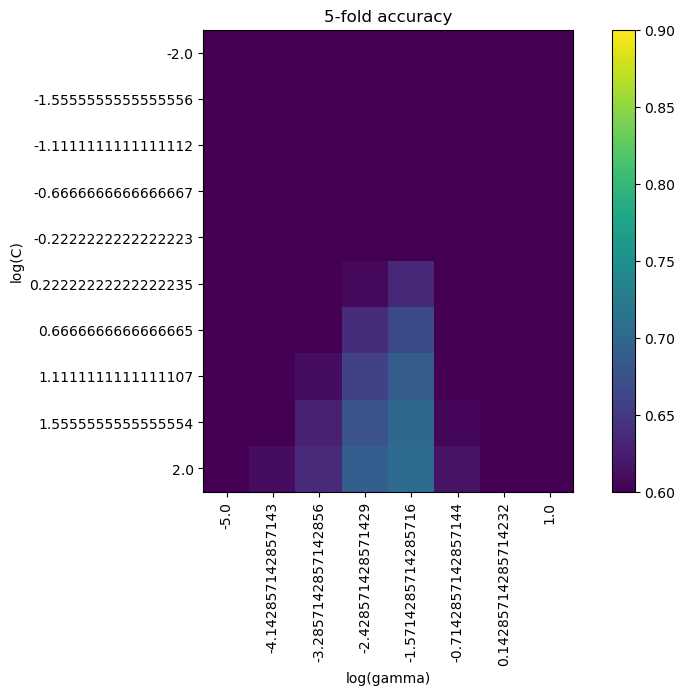

In [159]:
print("best mean cross-validation score: {:.3f}".format(grid_svm.best_score_))
print("best parameters: {}".format(grid_svm.best_params_))

print("Gamma en la gráfica: ", np.log10(grid_svm.best_params_['gamma']))
print("C en la gráfica: ", np.log10(grid_svm.best_params_['C']))

# Mostramos prestaciones en CV
scores = grid_svm.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [160]:
Copt = grid_svm.best_params_['C']
Gopt = grid_svm.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train.ravel())

print(f'Acc (TRAIN): {svmModel.score(XtrainScaled,y_train):0.2f}')
print(f'Acc (TEST): {svmModel.score(XtestScaled,y_test):0.2f}')

Acc (TRAIN): 0.78
Acc (TEST): 0.74


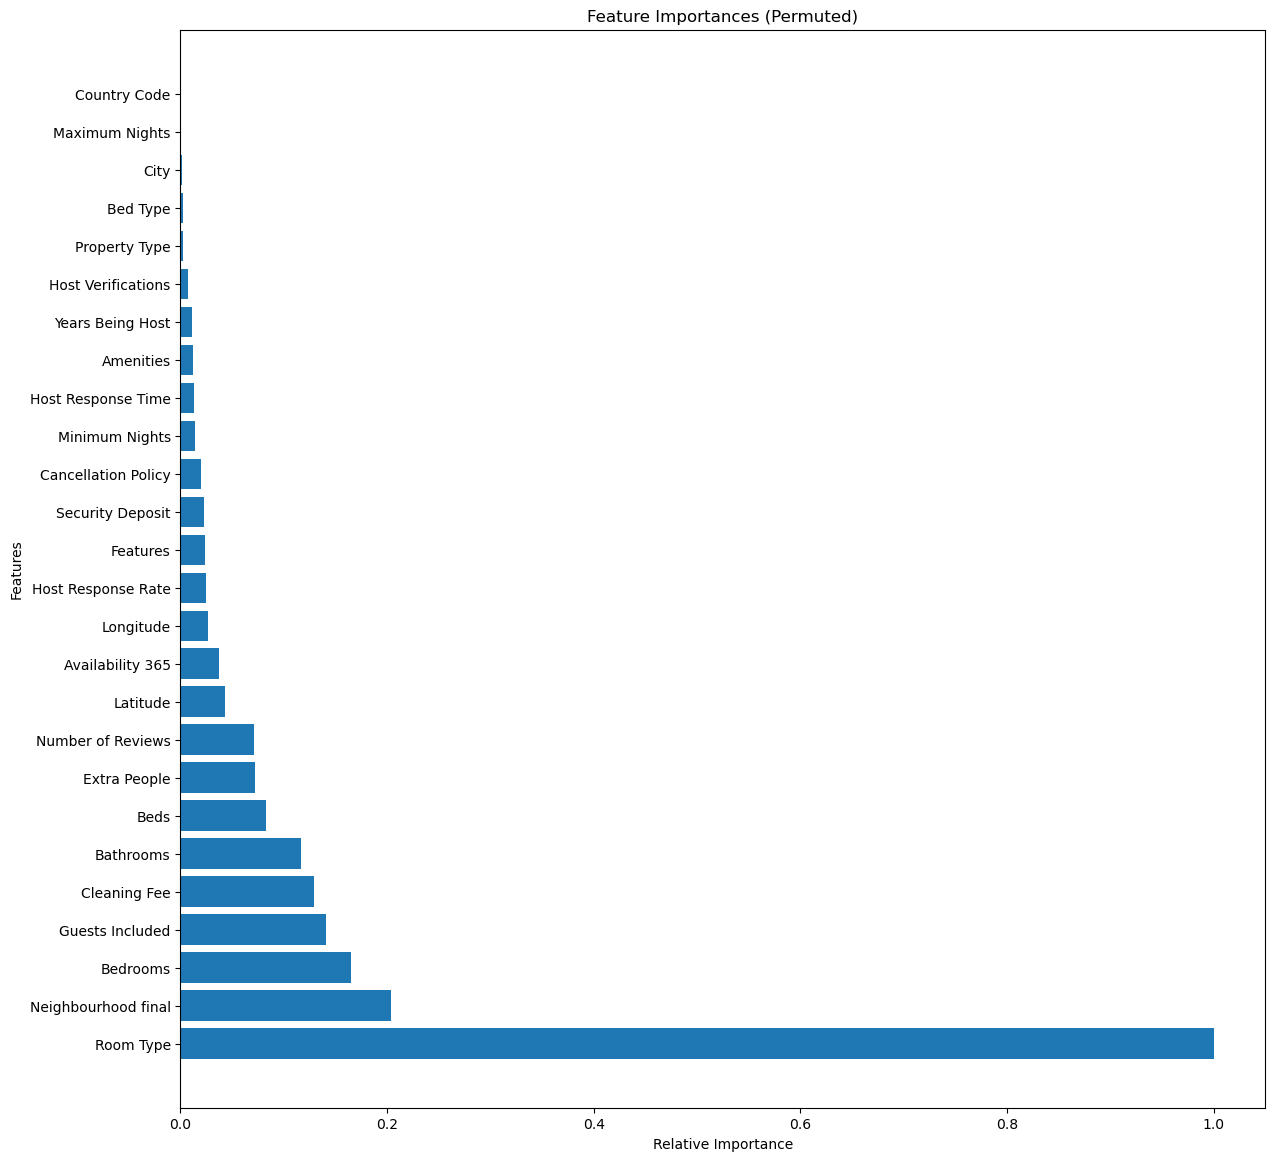

In [162]:
# DEMORA MUCHO LA EJECUCIÓN

from sklearn.inspection import permutation_importance

# Importancia de las características utilizando permutación
result = permutation_importance(svmModel, XtestScaled, y_test, n_repeats=30, random_state=42, n_jobs=-1)

importances = result.importances_mean
importances = importances / np.max(importances)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14,14))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), np.array(feature_names)[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Permuted)')
plt.show()

#### - Boosted Trees

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define hyperparameters
Niterations = [500, 1000, 5000, 8000]
learningRate = [0.1, 0.05]

# Static max_depth
param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}

# Initialize the GridSearchCV with GradientBoostingRegressor
grid_bt = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv=5, verbose=2)

# Fit the model
grid_bt.fit(X_train, y_train.ravel())

# Output the best score and parameters
print("Best mean cross-validation score: {:.3f}".format(grid_bt.best_score_))
print("Best parameters: {}".format(grid_bt.best_params_))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.1s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   8.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  15.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  15.9s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  15.9s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  15.9s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  15.9s
[CV] END ...............learning_rate=0.1, n_estimators=5000; total time= 1.3min
[CV] END ...............learning_rate=0.1, n_esti

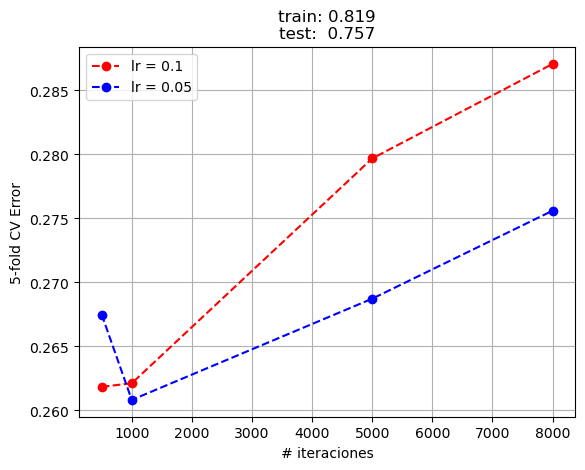

In [165]:
# ENTRENAMIENTO CON GRADIENT_BOOSTING_REGRESSOR

# Obtener los mejores parámetros
learning_rate_optimo = grid_bt.best_params_['learning_rate']
NEstimators_optimo = grid_bt.best_params_['n_estimators']

# Entrenamiento con los mejores parámetros
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=learning_rate_optimo, n_estimators=NEstimators_optimo)
bt.fit(X_train,y_train.ravel())

error = 1-grid_bt.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [166]:
# Predicciones en el conjunto de prueba
yboost_predict = bt.predict(X_test)

testing_set_score = bt.score(X_test, y_test)
median_abs_error = median_absolute_error(y_test, yboost_predict)
mean_abs_error = mean_absolute_error(y_test, yboost_predict)

print('Mejores parámetros:', grid_bt.best_params_)
print('R^2 en datos de test: ' + str(round(testing_set_score,3)))
print('Mediana del error en datos de test: ' + str(round(median_abs_error,3)))
print('Media del error en datos de test: ' + str(round(mean_abs_error,3)))


Mejores parámetros: {'learning_rate': 0.05, 'n_estimators': 1000}
R^2 en datos de test: 0.757
Mediana del error en datos de test: 8.578
Media del error en datos de test: 12.302


In [167]:
# Calcular métricas de rendimiento adicionales
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, yboost_predict)
r2 = r2_score(y_test, yboost_predict)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 305.5650386067168
R-squared (R2): 0.7573142409606559


In [168]:
print("lrOptimo: ",grid_bt.best_params_['learning_rate'])
print("neOptimo: ",grid_bt.best_params_['n_estimators'])
print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

lrOptimo:  0.05
neOptimo:  1000
Train:  0.8192696831753105
Test:  0.7573142409606559


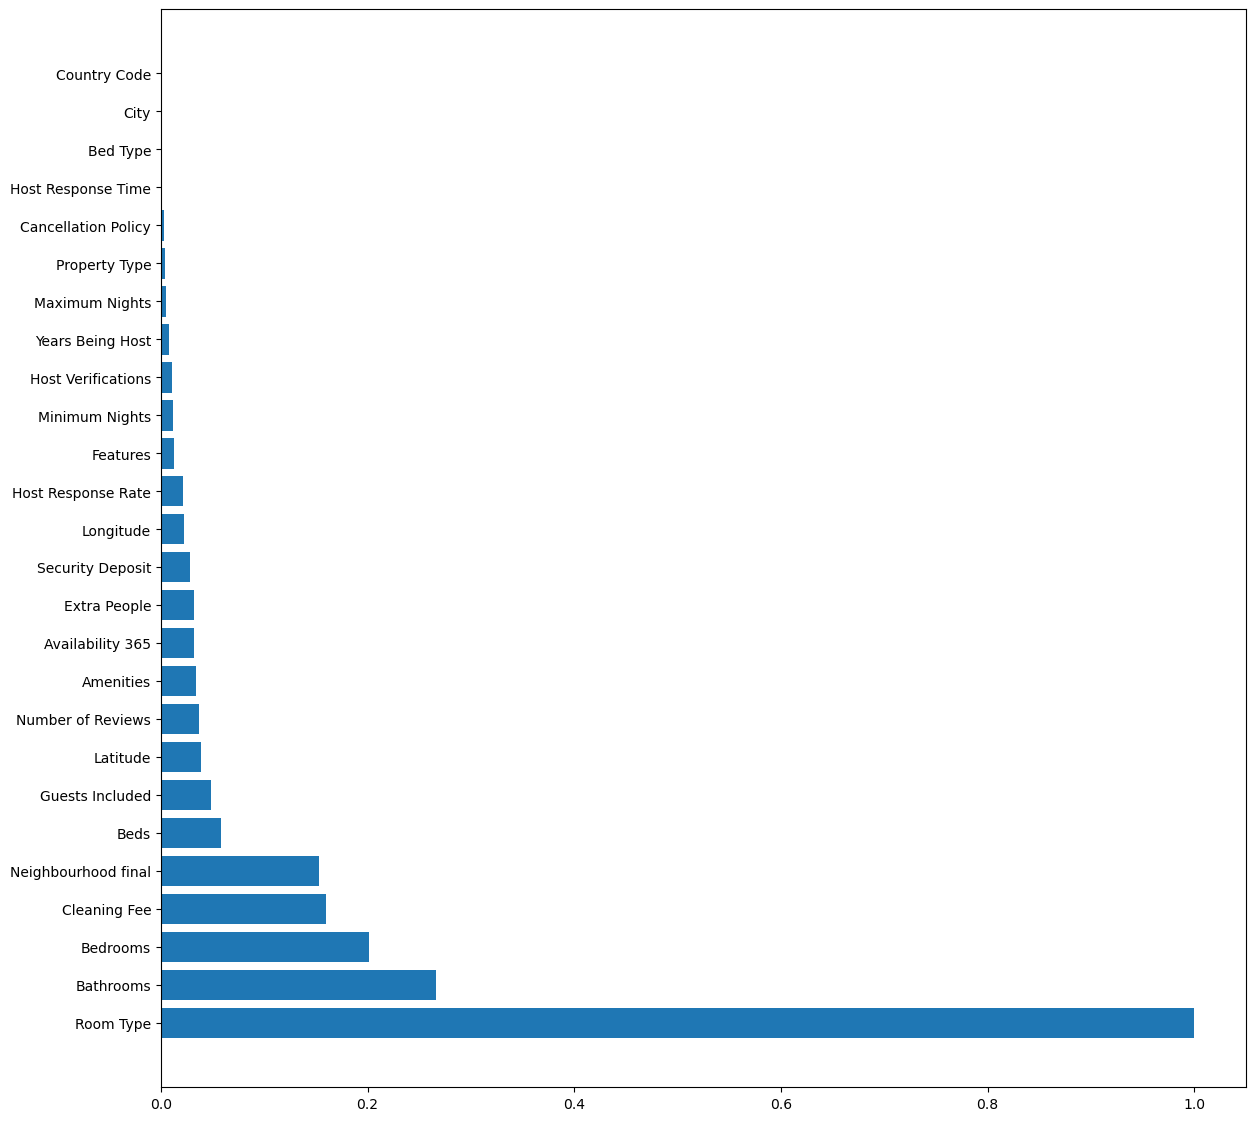

In [169]:
importances_bt = bt.feature_importances_
importances_bt = importances_bt / np.max(importances_bt)

indices_bt = np.argsort(importances_bt)[::-1]

plt.figure(figsize=(14,14))
plt.barh(range(X_train.shape[1]),importances_bt[indices_bt])
plt.yticks(range(X_train.shape[1]),feature_names[indices_bt])
plt.show()

#### - Random Forest

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.5s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=3; total time=   0.7s
[CV] END ........................................max_depth=4; total time=   0.8s
[CV] END ........................................max_depth=4; total time=   0.8s
[CV] END .......................................

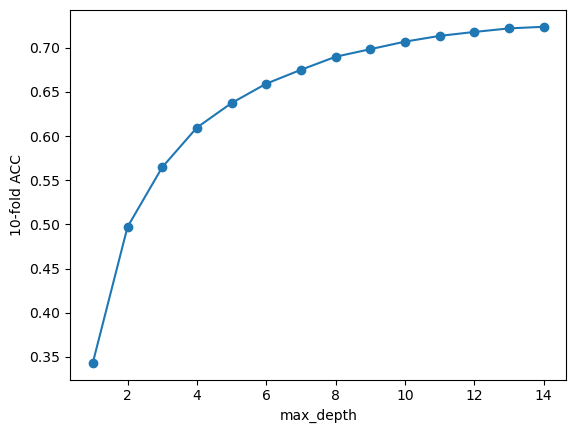

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt', oob_score=True), param_grid=tuned_parameters,cv=3, verbose=2) 
grid_rf.fit(X_train, y_train.ravel())

print("best mean cross-validation score: {:.3f}".format(grid_rf.best_score_))
print("best parameters: {}".format(grid_rf.best_params_))

scores = np.array(grid_rf.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

maxDepthOptimo = grid_rf.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt', oob_score=True).fit(X_train,y_train.ravel())

y_predict = grid_rf.predict(X_test)

rft_testing_set_score = randomForest.score(X_test, y_test)
rf_median_abs_error = median_absolute_error(y_test, y_predict)
rft_median_abs_error = median_absolute_error(y_test, y_predict)
rf_mean_abs_error = mean_absolute_error(y_test, y_predict)

print('Mejores parámetros:', grid_rf.best_params_)
print('R^2 en datos de test: ' + str(round(rf_testing_set_score,3)))
print('Mediana del error en datos de test: ' + str(round(rf_median_abs_error,3)))
print('Media del error en datos de test: ' + str(round(rf_mean_abs_error,3)))

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Mejores parámetros: {'max_depth': 14}
R^2 en datos de test: 0.743
Mediana del error en datos de test: 9.112
Media del error en datos de test: 12.724
Train:  0.9004268283293849
Test:  0.7425702425334832


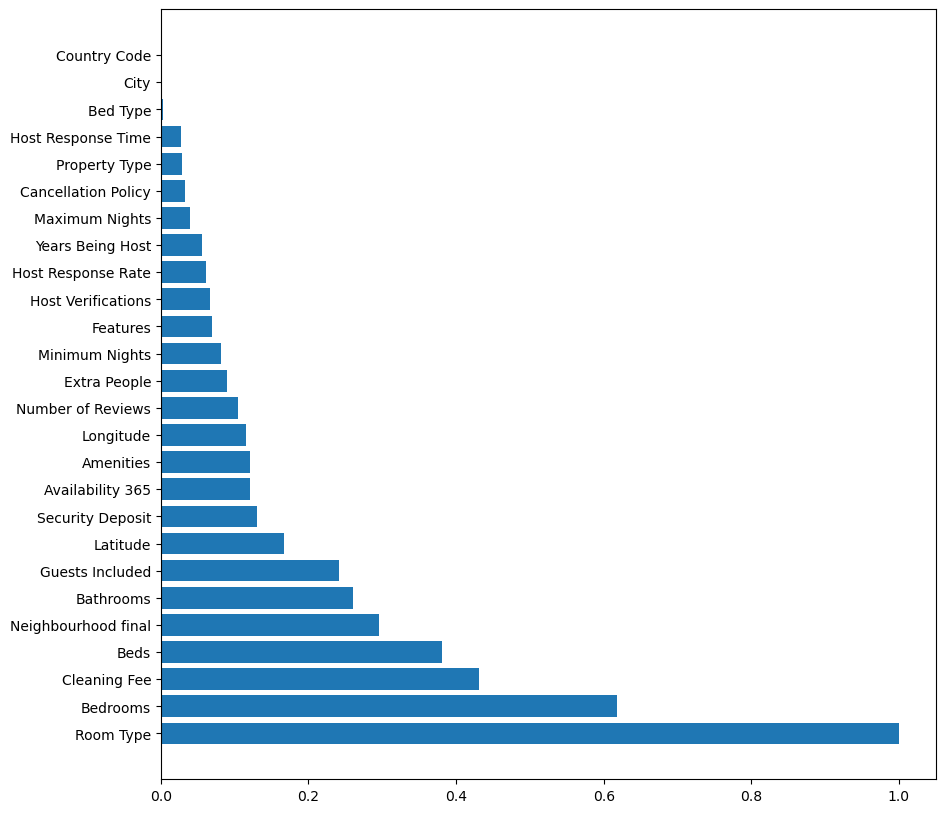

In [173]:
importances_rf = randomForest.feature_importances_
importances_rf = importances_rf / np.max(importances_rf)

indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances_rf[indices_rf])
plt.yticks(range(X_train.shape[1]),feature_names[indices_rf])
plt.show()

## 6) Resultados y métricas

In [176]:
import pandas as pd

# Datos para SVM
svm_train_acc = svmModel.score(XtrainScaled, y_train)
svm_test_acc = svmModel.score(XtestScaled, y_test)
svm_best_cv_score = grid_svm.best_score_
svm_best_params = grid_svm.best_params_

# Datos para Gradient Boosted Trees
bt_train_score = bt.score(X_train, y_train)
bt_test_score = bt.score(X_test, y_test)
bt_best_cv_score = grid_bt.best_score_
bt_best_params = grid_bt.best_params_
bt_median_abs_error = median_abs_error
bt_mean_abs_error = mean_abs_error

# Datos para Random Forest
rf_train_score = randomForest.score(X_train, y_train)
rf_test_score = randomForest.score(X_test, y_test)
rf_best_cv_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_
rf_median_abs_error = rf_median_abs_error
rf_mean_abs_error = rf_mean_abs_error

# Crear un DataFrame con los resultados
results = {
    'Model': ['SVM', 'Gradient Boosted Trees', 'Random Forest'],
    'Train Accuracy / R^2': [svm_train_acc, bt_train_score, rf_train_score],
    'Test Accuracy / R^2': [svm_test_acc, bt_test_score, rf_test_score],
    'Best CV Score': [svm_best_cv_score, bt_best_cv_score, rf_best_cv_score],
    'Best Params': [svm_best_params, bt_best_params, rf_best_params],
    'Median Abs Error': ['N/A', bt_median_abs_error, rf_median_abs_error],
    'Mean Abs Error': ['N/A', bt_mean_abs_error, rf_mean_abs_error]
}

results_df = pd.DataFrame(results)

# Mostrar el DataFrame
results_df

,Model,Train Accuracy / R^2,Test Accuracy / R^2,Best CV Score,Best Params,Median Abs Error,Mean Abs Error
0,SVM,0.777974,0.737048,0.704928,"{'C': 100.0, 'gamma': 0.026826957952797246}",N/A,N/A
1,Gradient Boosted Trees,0.819270,0.757314,0.739178,"{'learning_rate': 0.05, 'n_estimators': 1000}",8.578094,12.302163
2,Random Forest,0.900427,0.742570,0.723780,{'max_depth': 14},9.111801,12.723821


### Comparación de Modelos

**Support Vector Machine (SVM):** 🟠

    Precisión en Entrenamiento (R^2): 0.778
    Precisión en Prueba (R^2): 0.737
    Mejor Puntaje de Validación Cruzada: 0.705
    Mejores Parámetros: {'C': 100.0, 'gamma': 0.026826957952797246}
    Errores Medios Absolutos: N/A

El modelo SVM mostró un buen desempeño en el conjunto de entrenamiento con una precisión de 0.778 y en el conjunto de prueba con una precisión de 0.737. La diferencia moderada entre estos valores sugiere que el modelo generaliza bien a nuevos datos. La búsqueda de los mejores parámetros muestra que un valor alto de C y un valor bajo de gamma fueron los más efectivos.

**Gradient Boosted Trees:** 🟢

    Precisión en Entrenamiento (R^2): 0.819
    Precisión en Prueba (R^2): 0.757
    Mejor Puntaje de Validación Cruzada: 0.739
    Mejores Parámetros: {'learning_rate': 0.05, 'n_estimators': 1000}
    Error Absoluto Mediano: 8.578
    Error Absoluto Medio: 12.302

El modelo de Gradient Boosted Trees presentó la mayor precisión en el conjunto de prueba (0.757) y una precisión elevada en el conjunto de entrenamiento (0.819). Esto indica un buen equilibrio entre el ajuste a los datos de entrenamiento y la capacidad de generalización. Además, los errores absolutos medianos y medios sugieren que este modelo tiene un desempeño consistente y robusto.

**Random Forest:** 🔴

    Precisión en Entrenamiento (R^2): 0.900
    Precisión en Prueba (R^2): 0.743
    Mejor Puntaje de Validación Cruzada: 0.724
    Mejores Parámetros: {'max_depth': 14}
    Error Absoluto Mediano: 9.112
    Error Absoluto Medio: 12.724

El modelo de Random Forest tuvo la mayor precisión en el conjunto de entrenamiento (0.900), indicando un posible sobreajuste. La precisión en el conjunto de prueba fue 0.743, lo que, aunque alto, muestra una ligera caída en comparación con el conjunto de entrenamiento. Los errores absolutos medianos y medios fueron mayores en comparación con el modelo de Gradient Boosted Trees, lo que sugiere que este modelo puede no ser tan robusto.

### Conclusiones

- **Mejor Modelo en General:** El modelo de Gradient Boosted Trees parece ser el más equilibrado en términos de precisión en el conjunto de prueba y errores medios. Su precisión de prueba más alta y errores más bajos indican que este modelo tiene la mejor capacidad de generalización y desempeño en datos no vistos.

- **Modelo con Mayor Ajuste a Datos de Entrenamiento:** El modelo de Random Forest muestra la mayor precisión en el conjunto de entrenamiento, lo que podría indicar un sobreajuste a los datos de entrenamiento. Sin embargo, su desempeño en el conjunto de prueba y los errores absolutos sugieren que no generaliza tan bien como el modelo de Gradient Boosted Trees.

- **Modelo con Buen Balance entre Precisión y Generalización:** El SVM tiene un buen balance entre precisión en el conjunto de entrenamiento y prueba, aunque no alcanza la precisión del modelo de Gradient Boosted Trees en el conjunto de prueba.

En resumen, el modelo de **Gradient Boosted Trees es el más recomendable** para este conjunto de datos debido a su capacidad para mantener una alta precisión y bajos errores en datos de prueba, indicando una mejor generalización en comparación con los otros modelos evaluados.